In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn
from sklearn.datasets import make_blobs, make_circles, make_moons
from sklearn.preprocessing import MinMaxScaler


In [3]:
# setting random state
np.random.seed(8)

In [2]:
# Data set generations
class GenDataset():

    def __int__(self):
        self.X = None
        self.y = None

    def blobs(self, n_samples=100, centers=3, n_features=2):
        self.X, self.y = make_blobs(n_samples=n_samples, centers=centers, 
                                    n_features=n_features, random_state=10)
        return self.X, self.y

    def cirlces(self, n_samples=100, noise=None, factor=0.8):
        self.X, self.y = make_circles(n_samples=n_samples, shuffle=True, 
                                        noise=noise, factor=factor, random_state=10)
        return self.X, self.y

    def moons(self, n_samples=100, noise=None):
        self.X, self.y = make_moons(n_samples=n_samples, shuffle=True, 
                                    noise=noise, random_state=10)
        return self.X, self.y

In [4]:
# Generating data
data_gen = GenDataset()
X, y = data_gen.blobs(n_samples=500)

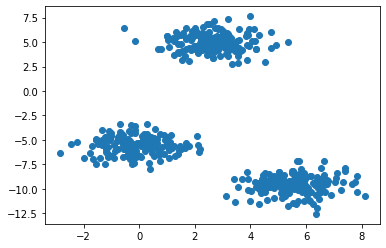

In [6]:
# plotting  clusters
plt.scatter(X[:,0], X[:,1])

In [5]:
y

array([1, 0, 1, 0, 1, 2, 1, 2, 2, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 2, 1,
       2, 2, 0, 2, 2, 0, 1, 0, 1, 1, 2, 1, 1, 0, 1, 1, 2, 0, 0, 1, 0, 0,
       2, 2, 0, 1, 2, 2, 1, 1, 0, 2, 0, 1, 2, 1, 0, 1, 2, 0, 1, 0, 0, 1,
       1, 1, 0, 2, 0, 2, 2, 2, 1, 1, 1, 2, 0, 1, 1, 1, 0, 2, 1, 0, 2, 0,
       1, 0, 1, 1, 1, 1, 2, 1, 1, 0, 1, 0, 1, 0, 2, 0, 2, 1, 2, 0, 2, 0,
       0, 0, 0, 0, 1, 2, 0, 2, 0, 0, 2, 0, 1, 0, 0, 1, 0, 2, 0, 1, 1, 2,
       1, 2, 2, 2, 1, 2, 2, 0, 1, 1, 0, 2, 1, 1, 0, 0, 1, 2, 2, 0, 2, 1,
       0, 0, 0, 2, 1, 0, 0, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 0, 0, 1,
       2, 0, 1, 0, 1, 1, 1, 2, 0, 2, 2, 1, 2, 1, 0, 0, 2, 1, 2, 0, 0, 1,
       1, 1, 0, 2, 2, 0, 1, 0, 1, 1, 1, 2, 2, 1, 0, 1, 1, 1, 0, 2, 2, 2,
       2, 1, 2, 2, 0, 1, 2, 1, 2, 2, 2, 1, 0, 1, 1, 0, 0, 2, 2, 2, 1, 2,
       2, 1, 2, 2, 2, 0, 2, 0, 2, 2, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 2, 2,
       1, 0, 1, 2, 1, 2, 0, 0, 2, 2, 0, 1, 0, 0, 0, 2, 1, 0, 1, 0, 2, 0,
       2, 1, 1, 0, 0, 1, 2, 1, 2, 0, 2, 0, 1, 2, 1,

In [7]:
# Scaling

def scaling(x):
    x_min = np.amin(x, axis=0)
    x_max = np.amax(x, axis=0)
    return((x-x_min)/(x_max-x_min))


In [8]:
X = scaling(X)

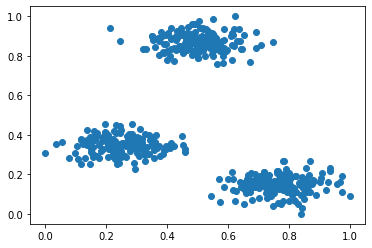

In [9]:
# plotting  clusters after scaling
plt.scatter(X[:,0], X[:,1])

In [10]:
# kmeans clustering model

class k_means:


    def __init__(self, k):
        self.k = k


    def initialize_centroids_random(self, X):
        # getting initial centroids/centers using random method
        np.random.seed(10)
        num_rows = X.shape[0]
        centroid_indices =   np.random.choice(num_rows, size=self.k, replace=False)
        centroids = X[centroid_indices, :]
        return centroids

    def initialize_centroid_kmeansplus(self, X):
        # getting initial centroids using Kmeans++ method
        np.random.seed(10)
        centroids = [X[np.random.randint(X.shape[0])]]
        for i in range(self.k-1):
            # dist from each centroid
            eucd_distance = [np.sum(np.square(X-centroid), axis=1) for centroid in centroids] 
            # distances from nearest centroids
            eucd_distance = np.array(np.min(eucd_distance, axis=0)) 
            prob = eucd_distance/np.sum(eucd_distance)
            centroids.append(X[np.argmax(prob)])
        return np.array(centroids)



    def train(self, X, epochs=1000, threshold=0.0001, intialize_method="kmeans++"):

        """ Return the centroids numpy array, dictionary 
            with key as centroid number and values
            as list of assigned elements
        """
        
        k = self.k

        num_rows = X.shape[0]
        num_cols = X.shape[1]
        

        # getting initial centroids/centers
        if intialize_method == "kmeans++":
            centers = self.initialize_centroid_kmeansplus(X)
        elif intialize_method == "random":
            centers = self.initialize_centroids_random(X)



        # creating iterations 
        for _ in range(epochs):
            # keeping track of elements in clusters
            labeled = {}
            for i in range(k):
                labeled[i] = []

            # assigning elements to the centroids 
            for row in X:
                current_row = row
                distances = []
                for center in centers:
                    distances.append(np.linalg.norm(current_row-center))
                its_center = distances.index(min(distances))
                labeled[its_center].append(current_row)

            # new updated centroids
            new_centers = np.empty(shape=(k, num_cols))
            for center in range(k):
                new_centers[center] = np.average(labeled[center], axis=0)

            # checking threshold
            # if np.centers-new_centers
        
        centers = new_centers
        print(centers)

        # arranging labels for output
        y_output = np.empty(shape=(num_rows, 1))
        # print(labeled)
        # for key, value in labeled.items():
        #     for each in value:
        #         try:
        #             index_y = np.where(X, each)
        #             y_output[index_y] = key
        #             print(index_y, key)
        #         except:
        #             pass
        



        
        return new_centers , labeled, y_output


    


In [11]:
model = k_means(3)
centroid, labeled, y = model.train(X)

[[0.73573997 0.16229684]
 [0.50135412 0.86972698]
 [0.23149665 0.34656861]]


In [14]:
centers = model.initialize_centroid_kmeansplus(X)

In [16]:
np.array(centers)

array([[0.65669584, 0.14138974],
       [0.21125311, 0.94061012],
       [0.        , 0.30881783]])

In [34]:
centroid

array([[0.52984741, 0.27089278],
       [0.53622411, 0.89616961],
       [0.26773587, 0.70343693]])

In [41]:
  def plot_graph(centroids,clusters,k=3):
    colors=[np.zeros(clusters[i].shape[0],dtype=int) + i for i in range(k)]
    datapoints=np.concatenate(clusters)
    colors=np.concatenate(colors)
    plt.scatter(datapoints[:,0],datapoints[:,1],c=colors,s=20)
    plt.scatter(centroid[:,0],centroid[:,1],c='r',s=100,marker='^')

In [ ]:
plot_graph(centroid, )

array([0.46993335, 0.80837469])

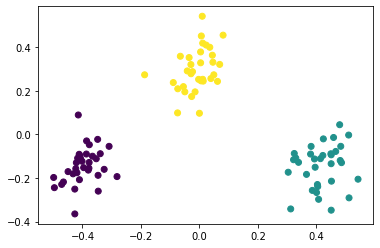

In [12]:
from sklearn.decomposition import PCA

pca_x = scaling(X)

pca = PCA(n_components=2).fit(pca_x)
pca_2d = pca.transform(pca_x)

plt.figure('K-means with 3 clusters')
plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=y)
plt.show()

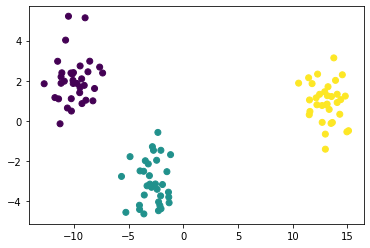

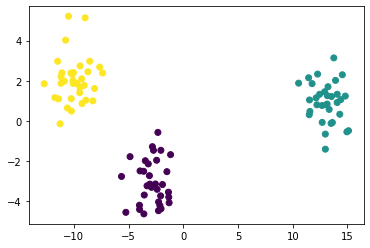

In [13]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
pca = PCA(n_components=2).fit(X)
pca_2d = pca.transform(X)
plt.figure('Reference Plot')
plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=y)
kmeans = KMeans(n_clusters=3, random_state=111)
kmeans.fit(X)
plt.figure('K-means with 3 clusters')
plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=kmeans.labels_)
plt.show()

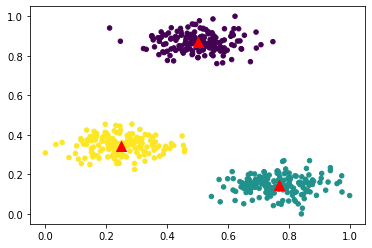

In [38]:
import numpy as np
from numpy.linalg import norm
import copy
class kmeans:
  def __init__(self,n_clusters,max_iter):
    self.n_clusters = n_clusters
    self.max_iter = max_iter

  #initialize the dataset randomaly
  def initialize_centroid_random(self,x):
    m = x.shape[0]
    idx = np.random.randint(0,m-1,self.n_clusters)
    centroid=[]
    for i in idx:
      centroid.append(x[i])
    # print(centroid)
    return np.array(centroid)

  #initialize the dataset with k mean ++ 
  def KMeanplusplus(self,x):
    np.random.seed(45)
    #choose first point randomly from dataset
    centroid=[x[np.random.randint(x.shape[0])]]
    for i in range(1,self.n_clusters):
      sq_dist=np.array([np.min([np.sum(np.square(centroid[c]-x),axis=1)for c in range(i)],axis=0)])
      probabilities = sq_dist/sq_dist.sum()
      centroid.append(x[np.argmax(probabilities)])
    return np.array(centroid)

  def compute_cluster(self,centroid,x):
    prev_centroid=centroid.copy()
    for epoch in range(self.max_iter):

      clusters=[[] for i in range(self.n_clusters)]
      for i in x:
        D=[]
        for c in centroid:
          distance=np.linalg.norm(i-c)
          D.append(distance)
        D=np.array(D)
        closest_point=np.argmin(D)
        clusters[closest_point].append(i)
      centroid=self.update_centroid(clusters)
      # print(centroid.shape)
      # print(centroid)
      # print(prev_centroid.shape)
      # print(prev_centroid)
      if prev_centroid.all()==centroid.all():
        break
      prev_centroid=centroid.copy()
    clusters=[np.array(cluster) for cluster in clusters]
    return clusters,centroid
  
  def update_centroid(self,cluster):
    new_centroid=[]
    for j in cluster:
      array_j=np.array(j)
      average=np.mean(array_j,axis=0)
      new_centroid.append(average)
    return np.array(new_centroid)


  def fit(self,x,initialize_method):
    
    if initialize_method=="random":
      centroid=self.initialize_centroid_random(x)
    elif initialize_method == "kmean++":
      centroid=self.KMeanplusplus(x)
      
    return self.compute_cluster(centroid,x)
  
  def plot_graph(self,centroids,clusters):
    colors=[np.zeros(clusters[i].shape[0],dtype=int) + i for i in range(self.n_clusters)]
    datapoints=np.concatenate(clusters)
    colors=np.concatenate(colors)
    plt.scatter(datapoints[:,0],datapoints[:,1],c=colors,s=20)
    plt.scatter(centroid[:,0],centroid[:,1],c='r',s=100,marker='^')
    





obj=kmeans(3,1000)
clusters,centroid=obj.fit(X,"kmean++")
obj.plot_graph(centroid,clusters)
# print(clusters,centroid)
# print(type(clusters))
# print(len(clusters))
# print(type(centroid))

In [39]:
centroid

array([[0.50135412, 0.86972698],
       [0.76751715, 0.14615382],
       [0.24812981, 0.34504773]])